In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [12]:
fx = lambda x: 2*x**2 - 3*x + 1

In [13]:
x = np.linspace(0,1.5, 100)
x1 = np.linspace(0.1, 0.7, 100)
# fx(x)

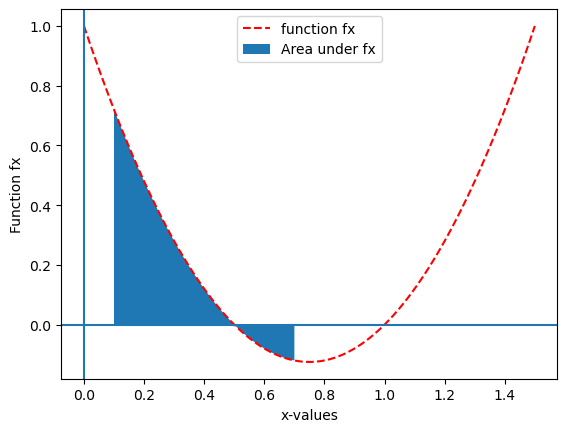

In [14]:
plt.plot(x, fx(x), 'r--', label='function fx')   # red-colored "dashed line"
plt.fill_between(x1, fx(x1), label='Area under fx')
plt.axhline() # y=0
plt.axvline() # x =0

plt.xlabel('x-values')
plt.ylabel('Function fx')
plt.legend(loc='upper center')

In [ ]:
# Integration is of 2 types: Definite, Indefinite !
# Integration of a function gives the AREA UNDER the Curve

In [32]:
np.round(quad(fx, 0.1, 0.7)[0], 4)   # fx is my "Integrand"

0.108

In [40]:
quad(fx, 0.1, 0.5)[0] + quad(fx, 0.5, 0.7)[0]   # piece-wise Integration

0.10799999999999998

In [41]:
quad(fx, 0.5, 0.7)[0]  

-0.014666666666666658

In [42]:
quad(fx, 0.1, 0.5)[0] + np.abs(quad(fx, 0.5, 0.7)[0])   # piece-wise Integration

0.1373333333333333

In [15]:
a = 2
b = 3

## indefinite integration

In [16]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
integrate(a*x**2 - b*x + c, x)

In [46]:
I = integrate(2*x**2 - 3*x + 1, x)
I

In [48]:
I.subs(x, 0.7) - I.subs(x, 0.1) # Substitute for the upper_limit & lower_limit

In [66]:
I.subs(x, 0.5) # means the area under curve from 0 till 0.5

In [31]:
a = 5
b = 10
fx = lambda x,a,b: a*x**2 - b*x + 1
quad(fx, 0.2, 1, args=(a,b))

(-2.346666666666667, 2.6053233644537012e-14)

#  Convex Optimization

In [49]:
# A function which strictly has one minima >> Convex Function
# Optimization >> We want to find the Minimimun value of an "objective" (cost or error) function, 
# and the value of the variable (x), against the minima (where fx is minimum)

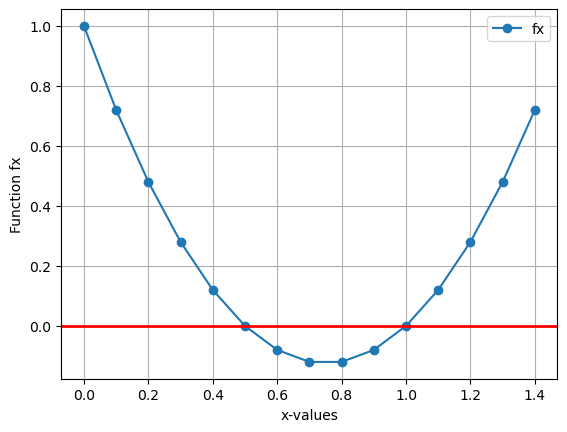

In [17]:
x = np.arange(0,1.5,0.1)

fx = lambda x: 2*x**2 - 3*x + 1

plt.plot(x, fx(x), 'o-', label="fx")
plt.axhline(linewidth=2, color='r')
plt.grid(True)
plt.xlabel('x-values')
plt.ylabel('Function fx')
plt.legend()

In [ ]:
# the points where the fx "crosses"/"touches" the x-axis.... >> those x-values are called as "roots" of the function
# when x=roots(fx), the values of fx=0  (means y-axis value will be 0)

In [88]:
jac = lambda x: 4*x - 3  
# jacobian (1st derivative of the function) refers to the slope of the tangent 
# at the point of maxima/minima (which should be close to zero)

# Why do i need jacobian ???
# ans: The point where the jac is close to zero, is the probable point of maximna/minima 
# (necesaary condn)

# but to confirm (sufficiency condition), Hessian (2nd derivative of fx) evaluated at ...
# the optimal points (points where the jacobian/1st derivatve is zero):
# gives a negative value >>> MAxima
# gives a positive value >>> Minima

In [18]:
from scipy.optimize import minimize

In [21]:
sol = minimize(fx, 0.7, options={'disp': True})
sol

Optimization terminated successfully.
         Current function value: -0.125000
         Iterations: 1
         Function evaluations: 6
         Gradient evaluations: 3


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.125
        x: [ 7.500e-01]
      nit: 1
      jac: [ 2.980e-08]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [22]:
sol.x  # This is the point where the minima occurs

array([0.75])

In [23]:
sol.fun   # This is the minimum value of the function

In [24]:
fx(sol.x)

array([-0.125])

In [25]:
sol = minimize(fx, 0, method='Nelder-Mead')
sol

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.12499999999999978
             x: [ 7.500e-01]
           nit: 24
          nfev: 48
 final_simplex: (array([[ 7.500e-01],
                       [ 7.501e-01]]), array([-1.250e-01, -1.250e-01]))

In [27]:
from scipy.optimize import fsolve

In [31]:
fx = lambda x: 2*x**2 - 3*x + 1 # solving where fx = 0
fsolve(fx, 2)

array([1.])

In [29]:
fx = lambda x: 2*x**2 - 3*x + 1 - 5 # solving where new_fx = fx - 5
fsolve(fx, 0)

array([-0.85078106])

In [30]:
fsolve(fx, 1.5, full_output=1)

(array([2.35078106]),
 {'nfev': 9,
  'fjac': array([[-1.]]),
  'r': array([-6.40311253]),
  'qtf': array([1.10273701e-08]),
  'fvec': array([1.95399252e-14])},
 1,
 'The solution converged.')

In [32]:
from scipy.optimize import root

In [36]:
root(fx, 20)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 1.000e+00]
    nfev: 17
    fjac: [[-1.000e+00]]
       r: [-1.000e+00]
     qtf: [-3.670e-12]

In [38]:
root(fx, 1.5)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.91038305e-11])
       r: array([-1.00000048])
  status: 1
 success: True
       x: array([1.])

In [37]:
from scipy.linalg import inv, det

In [38]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [39]:
arr.shape

In [40]:
1/arr   # not the matrix inverse, inverting every element of the array/matrix

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667],
       [0.14285714, 0.125     , 0.11111111]])

In [41]:
det(arr)  # implies that, my matrix is SINGULAR !! .... WHICH FURTHER MEANS THAT IT IS NON-INVERTIBLE!!!

In [42]:
np.linalg.det(arr)  # numpy function does not give me 0!

In [43]:
inv(arr)   # matrix inverse

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [44]:
arr.dot(inv(arr))

array([[ 0. ,  1. , -0.5],
       [ 0. ,  2. , -1. ],
       [-4. ,  3. , -1.5]])

In [46]:
arr = np.array([[10,20,30],[14,5,6],[7,88,9]])
arr

array([[10, 20, 30],
       [14,  5,  6],
       [ 7, 88,  9]])

In [47]:
det(arr) 

In [48]:
inv(arr) 

array([[-0.01642857,  0.08367347, -0.00102041],
       [-0.00285714, -0.00408163,  0.0122449 ],
       [ 0.04071429, -0.02517007, -0.00782313]])

In [49]:
np.round(arr.dot(inv(arr)),15)  # this is indeed an IDENTITY MATRIX... as expected !!

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [135]:
np.zeros(3)

array([0., 0., 0.])

## Solve a system of Linear Equations

In [50]:
from scipy.optimize import fsolve

In [52]:
def system_of_fun(var):
    # this system of equations will have 3 variables!!
    x = var[0]
    y = var[1]
    z = var[2]
    
    Fun = np.zeros(3)
#     Fun[0] = lambda x,y,z: 2*x + 3*y + z - 21
#     Fun[1] = lambda x,y,z: -x + 5*y + 4*z - 9
#     Fun[2] = lambda x,y,z: 3*x + 2*y + 9*z - 6
    
    Fun[0] = 2*x + 3*y + z - 21
    Fun[1] = -x + 5*y + 4*z - 9
    Fun[2] = 3*x + 2*y + 9*z - 6
    
    return Fun

In [53]:
sol = fsolve(system_of_fun, np.array([0,0,0]))
sol

array([ 4.95,  4.35, -1.95])

In [54]:
sol[0], sol[1], sol[2]

In [55]:
sol = fsolve(system_of_fun, np.array([0,0,0]), full_output=True)

x = sol[0][0]
y = sol[0][1]
z = sol[0][2]
print(x,y,z)

4.950000000000001 4.3500000000000005 -1.9500000000000004


In [56]:
sol

(array([ 4.95,  4.35, -1.95]),
 {'nfev': 6,
  'fjac': array([[-0.53452248,  0.26726124, -0.80178373],
         [-0.34050261, -0.93638218, -0.08512565],
         [ 0.77352678, -0.22750788, -0.59152048]]),
  'r': array([-3.74165739, -1.87082869, -6.68153105, -5.87367006, -4.85216223,
         -5.46018906]),
  'qtf': array([-2.97327266e-11, -3.50797258e-11,  2.32235470e-11]),
  'fvec': array([3.55271368e-15, 3.55271368e-15, 0.00000000e+00])},
 1,
 'The solution converged.')

In [93]:
sol[-1]

'The solution converged.'

In [57]:
x,y,z= fsolve(system_of_fun, np.array([1,2,3]) )
print(x,y,z)

4.950000000000001 4.3500000000000005 -1.9500000000000004
